# <font style = "color:rgb(50,120,229)"> Coin Detection </font>

So far we have studied about various mophological operations and different thresholding techniques in some detail. Now it's time to apply these concepts for a practical application - **Coin Detection**.

## <font style = "color:rgb(50,120,229)"> Aim </font>

In this assignment, you will work with 2 different images (so 2 different parts) and will use **only** morphological operations and thresholding techniques to detect the total number of coins present in the image. Your submission will be graded based on your use of the concepts covered in this module, experimentation performed to achieve at your final solution, documentation, and finally, the total number of coins successfully detected in the images. Each part will be of 15 marks. This assignment will be entirely **manually graded** so make sure that you do NOT remove any experimentation you have done as well as the observation you made after each step.

**Proper documentation for each step should be provided with help of markdown**

## <font style = "color:rgb(50,120,229)">Outline</font>

The main steps that you can follow to solve this assignment are:

1. Read the image.
2. Convert it to grayscale and split the image into the 3 (Red, Green and Blue) channels. Decide which of the above 4 images you want to use in further steps and provide reason for the same.
3. Use thresholding and/or morphological operations to arrive at a final binary image.
4. Use **simple blob detector** to count the number of coins present in the image.
5. Use **contour detection** to count the number of coins present in the image.
6. Use **CCA** to count the number of coins present in the image.

**We have also provided the results we obtained at the intermediate steps for your reference.**

# <font style = "color:rgb(50,120,229)">Assignment Part - A</font>

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [ ]:
import cv2
import matplotlib.pyplot as plt
#from dataPath import DATA_PATH
import numpy as np
#%matplotlib inline

: 

In [147]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Text(0.5, 1.0, 'Original Image')

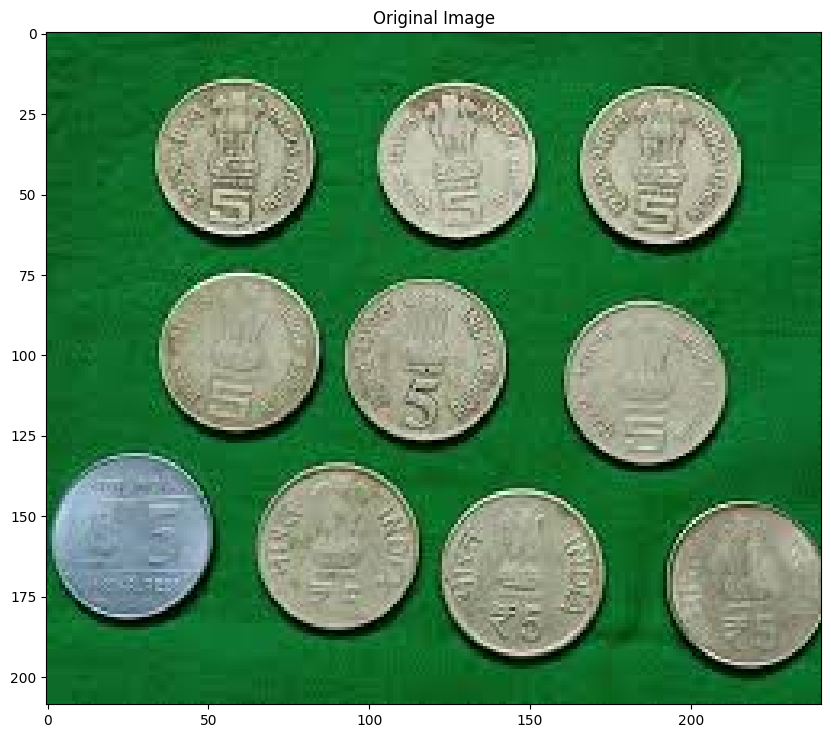

In [223]:
# Image path
#imagePath = "download.png"
imagePath = "CoinImage5.JPG"
# Read image
# Store it in the variable image
image = cv2.imread(imagePath)
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [224]:
# Convert image to grayscale
# Store it in the variable imageGray
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

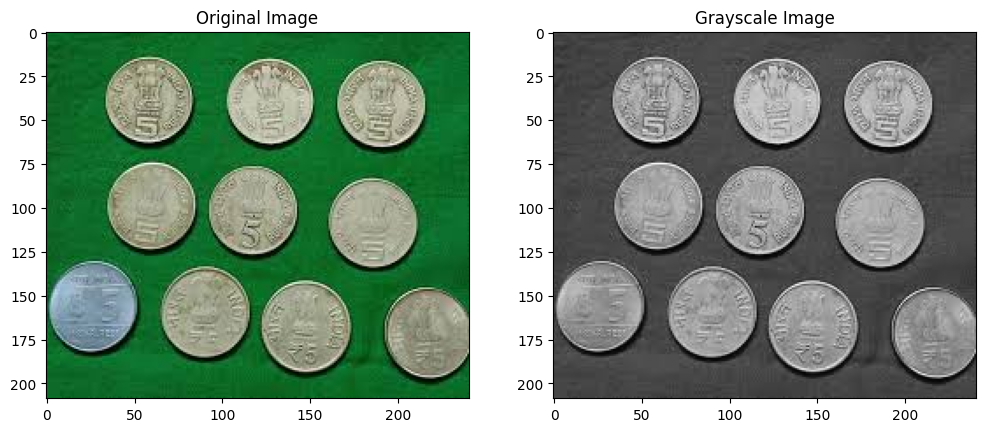

In [225]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray);
plt.title("Grayscale Image");

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [226]:
# Split cell into channels
# Store them in variables imageB, imageG, imageR
imageB = image[:,:,0]
imageG = image[:,:,1]
imageR = image[:,:,2]

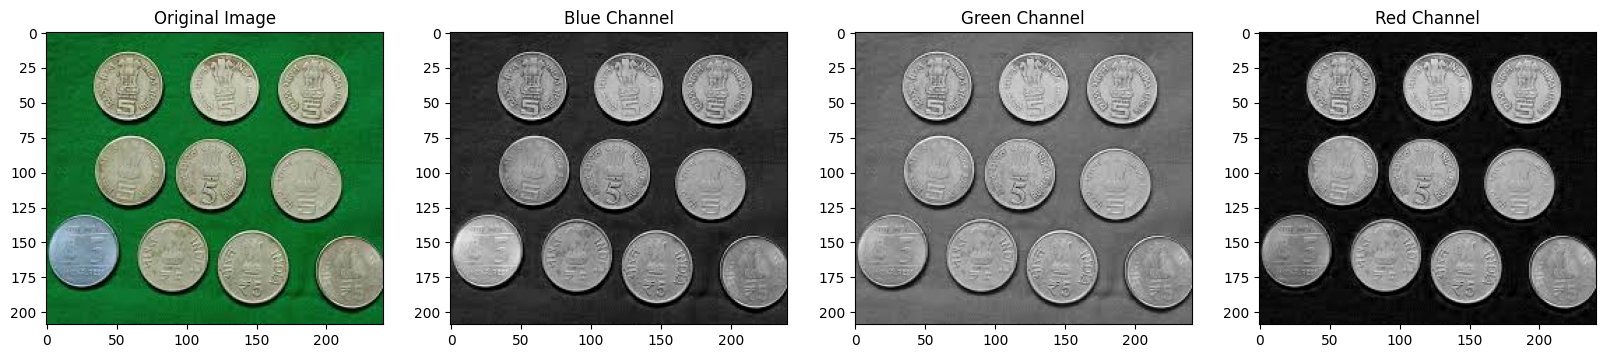

In [227]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

Threshold Value = 127, Max Value = 255


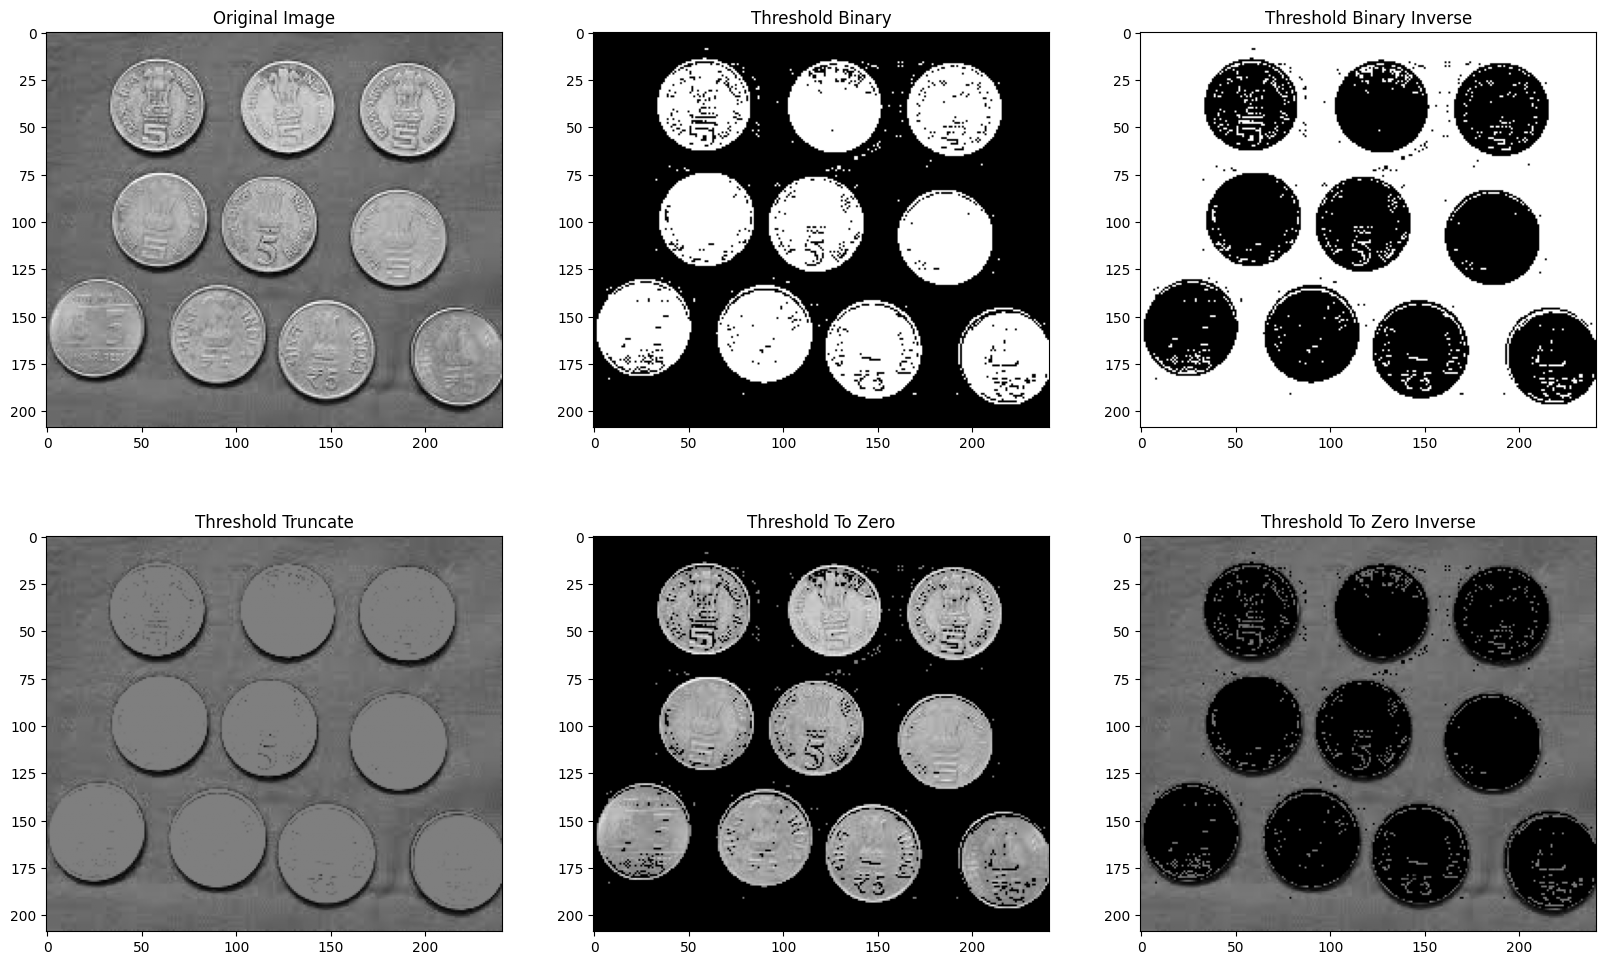

In [228]:
# Threshold Analysis
# Notes: imageGray did not work. Detected 8 coins and contained a lot of noise which is giving incorrect results
# in rest of the analysis so switched to green channel which gave more accurate results.
src = imageG.copy()
thresh = 127
maxValue = 255
th, dst_bin = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)
th, dst_bin_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY_INV)
th, dst_trunc = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TRUNC)
th, dst_to_zero = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO)
th, dst_to_zero_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO_INV)

print("Threshold Value = {}, Max Value = {}".format(thresh, maxValue))
plt.figure(figsize=[20,12])
plt.subplot(231);plt.imshow(src, cmap='gray', vmin=0, vmax=255);plt.title("Original Image");
plt.subplot(232);plt.imshow(dst_bin, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary");
plt.subplot(233);plt.imshow(dst_bin_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary Inverse");
plt.subplot(234);plt.imshow(dst_trunc, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Truncate");
plt.subplot(235);plt.imshow(dst_to_zero, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero");
plt.subplot(236);plt.imshow(dst_to_zero_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero Inverse");

### Section 3.1.1 : Experiment with blur and adaptive algorithms

From the above threshold analysis, Threshold Binary inverse is identifying most coins but contains a lot of noise. A noise reduction could be useful.


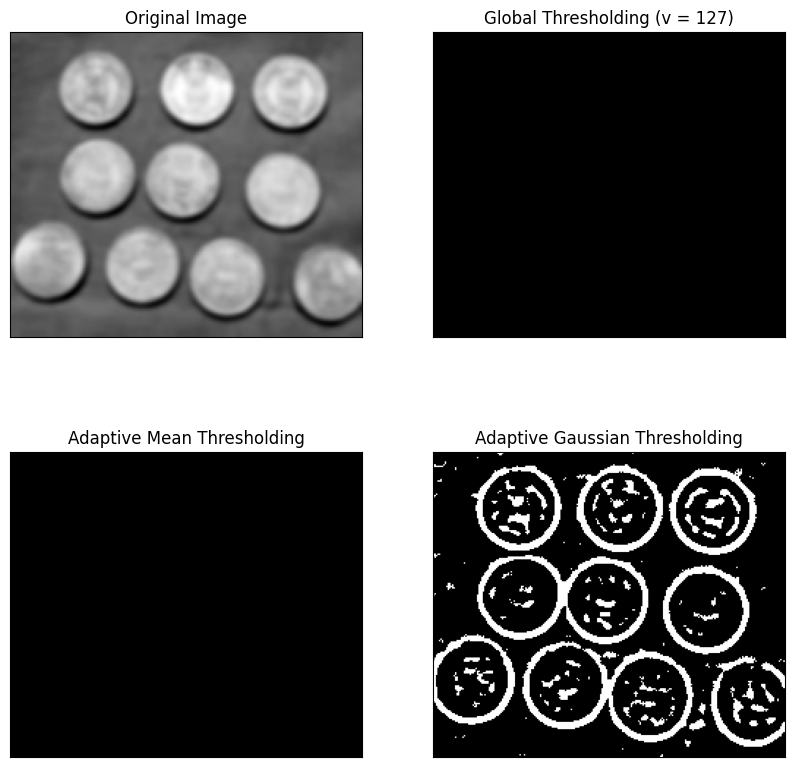

In [229]:
img = cv2.GaussianBlur(src, (11, 11), 0)
ret,th1 = cv2.threshold(img,50,255,cv2.THRESH_BINARY_INV)
th2 = cv2.adaptiveThreshold(th1,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

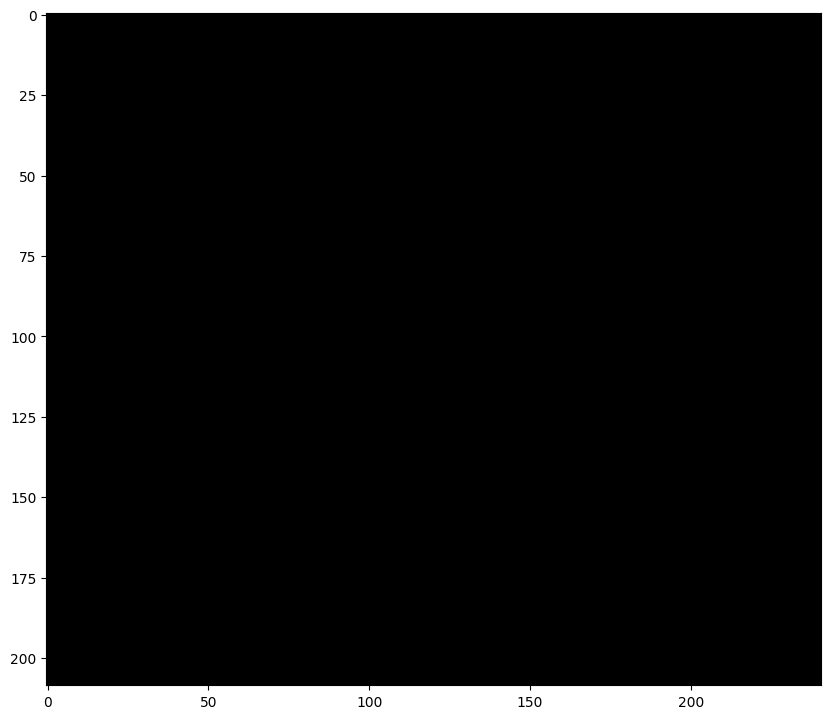

In [230]:
# Guassian blur with binary inverse looks promising. 
img = cv2.GaussianBlur(src, (11, 11), 0)
ret,threshIm = cv2.threshold(img,50,255,cv2.THRESH_BINARY_INV)
plt.imshow(threshIm)

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

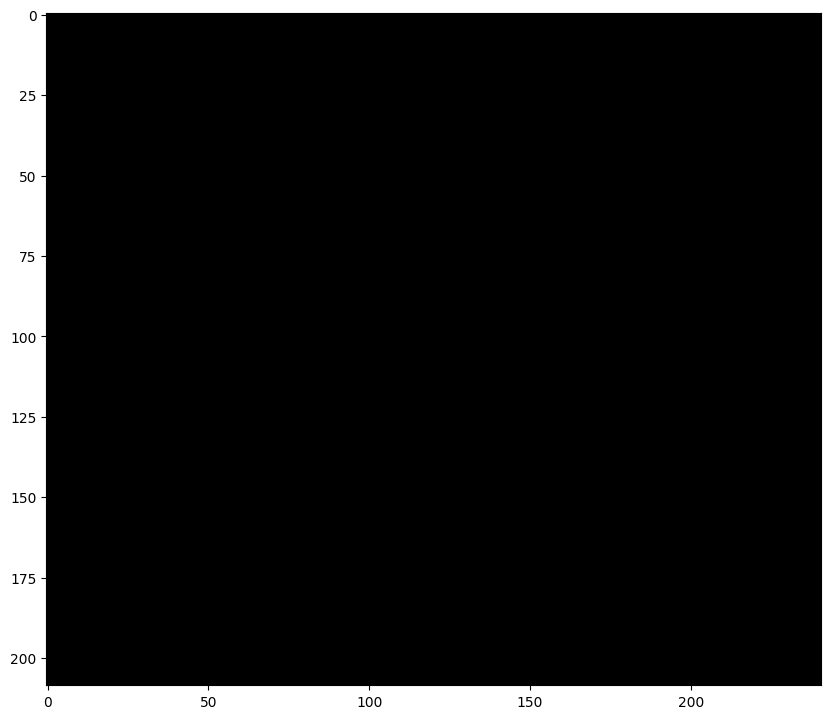

In [231]:
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
morph = cv2.erode(th1, kernel, iterations = 1)
plt.imshow(morph)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
morph = cv2.dilate(morph, kernel, iterations = 1)
plt.imshow(morph)

## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [209]:
#Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False
#
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.7

In [210]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector.detect(image)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

In [211]:
# Detect blobs
keypoints = detector.detect(morph)

blobs = cv2.cvtColor(morph, cv2.COLOR_GRAY2BGR)
 
# Mark blobs using image annotation concepts we have studied so far
index = 0
for k in keypoints:
    index = index + 1
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Mark center in BLACK
    cv2.circle(blobs,(x,y),5,(0,0,0),-1)
    # Get radius of blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Mark blob in RED
    cv2.circle(blobs,(x,y),radius,(0,0,255),2)

Number of coins found = 13


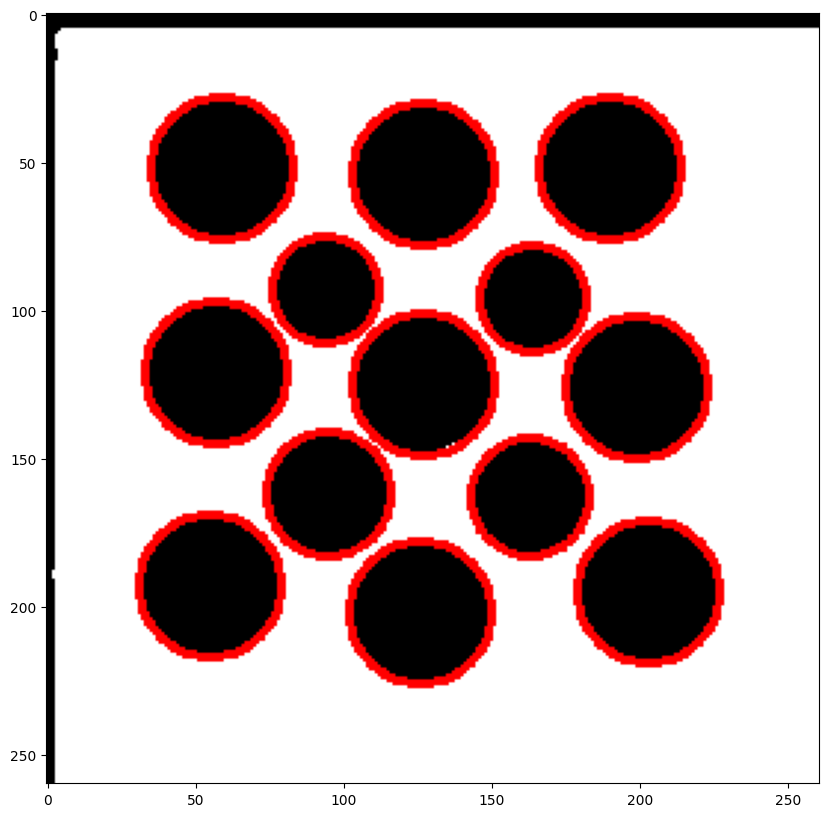

In [212]:
# Print number of coins detected
plt.imshow(blobs[:,:,::-1])
print("Number of coins found = {}".format(len(keypoints)))

**Note that we were able to detect all 9 coins. So, that's your benchmark.**

## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>

Make sure to mark the center of the blobs as well. **Use only the functions discussed in Image Annotation section in Week 1**

### <font style = "color:rgb(8,133,37)">Hints</font>
You can extract the coordinates of the center and the diameter of a blob using **`k.pt`** and **`k.size`** where `k` is a keypoint.

In [213]:
# Mark coins using image annotation concepts we have studied so far
im = image.copy()
index = 0
for k in keypoints:
    index = index + 1
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Mark center in BLACK
    cv2.circle(im,(x,y),5,(0,0,0),-1)
    # Get radius of blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Mark blob in RED
    cv2.circle(im,(x,y),radius,(0,0,255),2)
    cv2.putText(im, "{}".format(index), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 5);

Number of coins found = 13


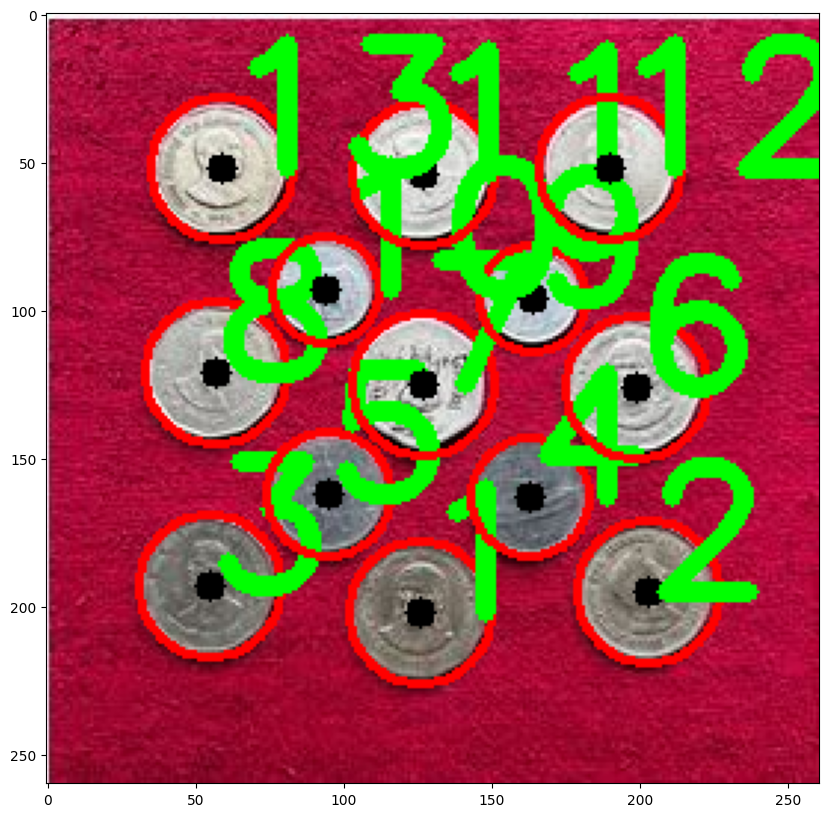

In [214]:
# Display the final image
plt.imshow(im[:,:,::-1])
print("Number of coins found = {}".format(len(keypoints)))

## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

In the final step, perform Connected Component Analysis (CCA) on the binary image to find out the number of connected components. Do you think we can use CCA to calculate number of coins? Why/why not?

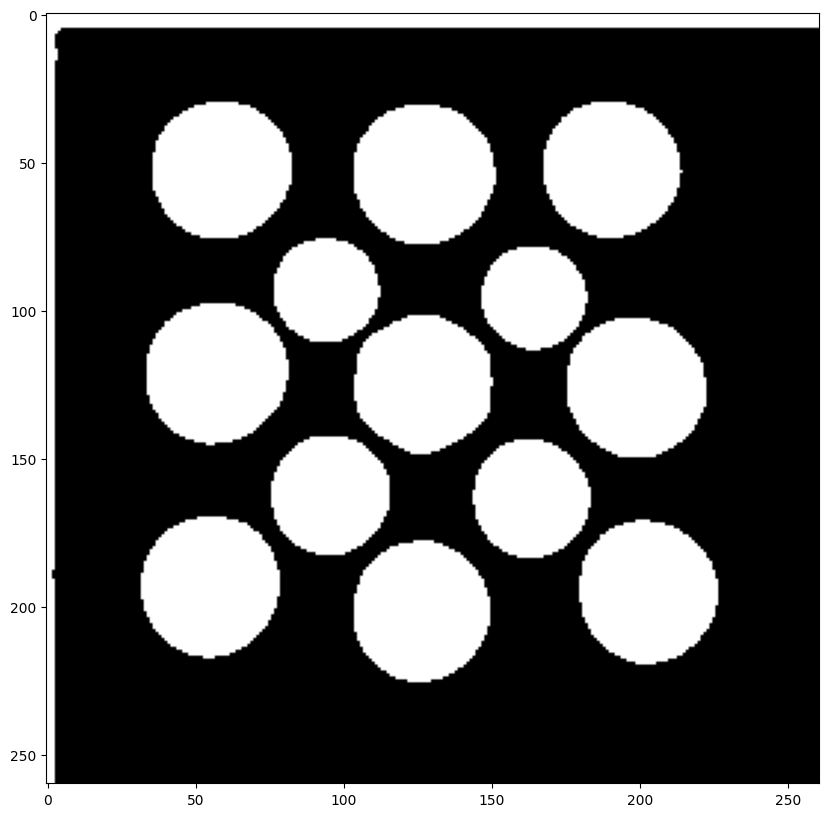

In [215]:
#We need a binary image for CCA.
img = cv2.GaussianBlur(src, (11, 11), 0)
ret,th1 = cv2.threshold(img,50,255,cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
morph = cv2.erode(th1, kernel, iterations = 1)
plt.imshow(morph)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
morph = cv2.dilate(morph, kernel, iterations = 1)
plt.imshow(morph)

In [216]:
def displayConnectedComponents(im):
    imLabels = im
    # The following line finds the min and max pixel values
    # and their locations in an image.
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(imLabels)
    # Normalize the image so the min value is 0 and max value is 255.
    imLabels = 255 * (imLabels - minVal)/(maxVal-minVal)
    # Convert image to 8-bits unsigned type
    imLabels = np.uint8(imLabels)
    # Apply a color map
    imColorMap = cv2.applyColorMap(imLabels, cv2.COLORMAP_JET)
    # Display colormapped labels
    plt.imshow(imColorMap[:,:,::-1])

Number of coins found = 15


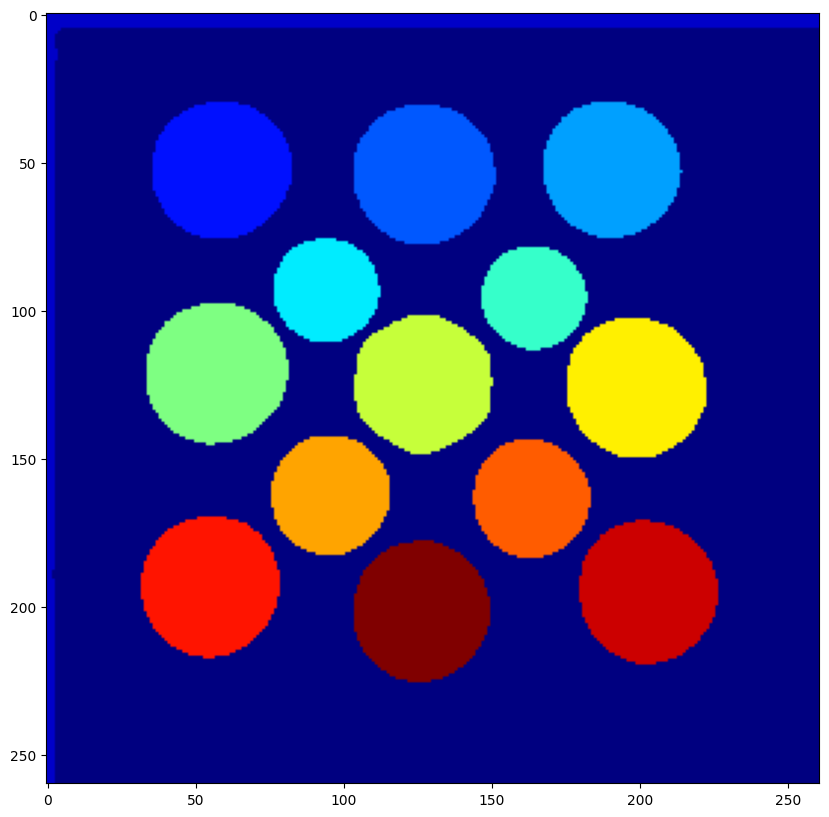

In [217]:
num_labels, labels_im = cv2.connectedComponents(morph)
displayConnectedComponents(labels_im)
print("Number of coins found = {}".format(num_labels))

### Note: Connected components analysis is showing 11 coins in comparison with Blob detector. 
Since blob detector had area based filtering which is filtering smaller blobs, like the edge of a coin barely visible at ~300 pixel on x. There might another similar blob in the picture that is being counted.

## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In the final step, perform Contour Detection on the binary image to find out the number of coins.

In [218]:
# Find all contours in the image
contours, hierarchy = cv2.findContours(morph, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [-1 12 -1 -1]]]


In [219]:
# Print the number of contours found
print("Number of contours found = {}".format(len(contours)))


Number of contours found = 14


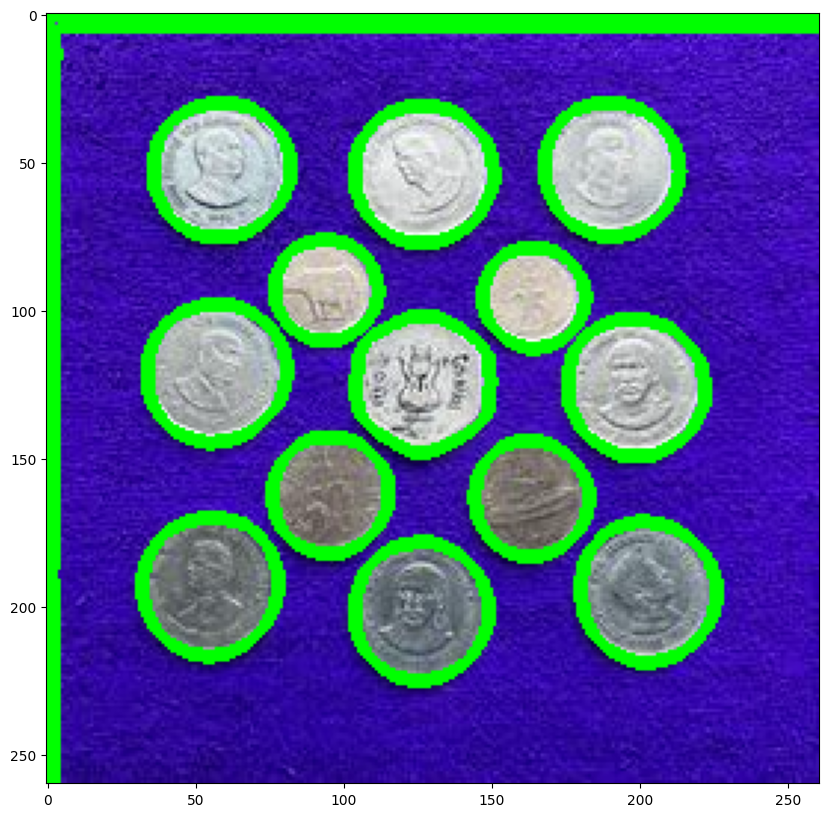

In [220]:
# Draw all contours
allContours = image.copy()
innerContours = image.copy()
cv2.drawContours(allContours, contours, -1, (0, 255, 0), 3)
plt.imshow(allContours)

Let's only consider the outer contours.

Number of contours found = 13


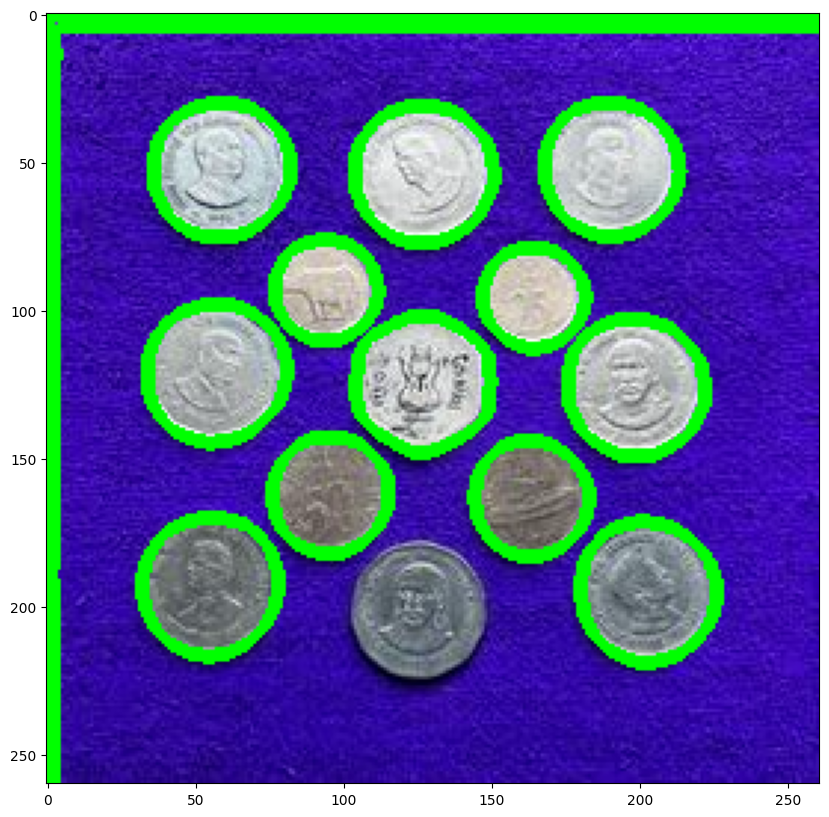

In [221]:
# Remove the inner contours
# Display the result
cv2.drawContours(innerContours, contours[1:], -1, (0, 255, 0), 3)
plt.imshow(innerContours)
print("Number of contours found = {}".format(len(contours[1:])))

So, we only need the inner contours. The easiest way to do that will be to remove the outer contour using area.

In [1]:
# Print area and perimeter of all contours
for index,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))

NameError: name 'contours' is not defined

# <font style = "color:rgb(50,120,229)">Coin Amount Detect</font>

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [3]:
#Loading History Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

#plt.style.use('seaborn-white')

df = pd.read_csv('History_Data.csv')
df.columns = ['epochs'] + df.columns[1:].tolist()
df['epochs'] = df['epochs'] + 1

df.head(5)

epochs  Unnamed: 0      loss       acc  val_loss   val_acc     lr
0       1           0  1.362841  0.326087  1.344207  0.346154  0.001
1       2           1  1.354143  0.335404  1.300498  0.346154  0.001
2       3           2  1.297900  0.309006  1.272186  0.346154  0.001
3       4           3  1.237293  0.413043  1.188661  0.378205  0.001
4       5           4  1.159002  0.447205  1.076584  0.474359  0.001

## <font style = "color:rgb(50,120,229)">Step 2: Visualizations/Accuracy Curve</font>

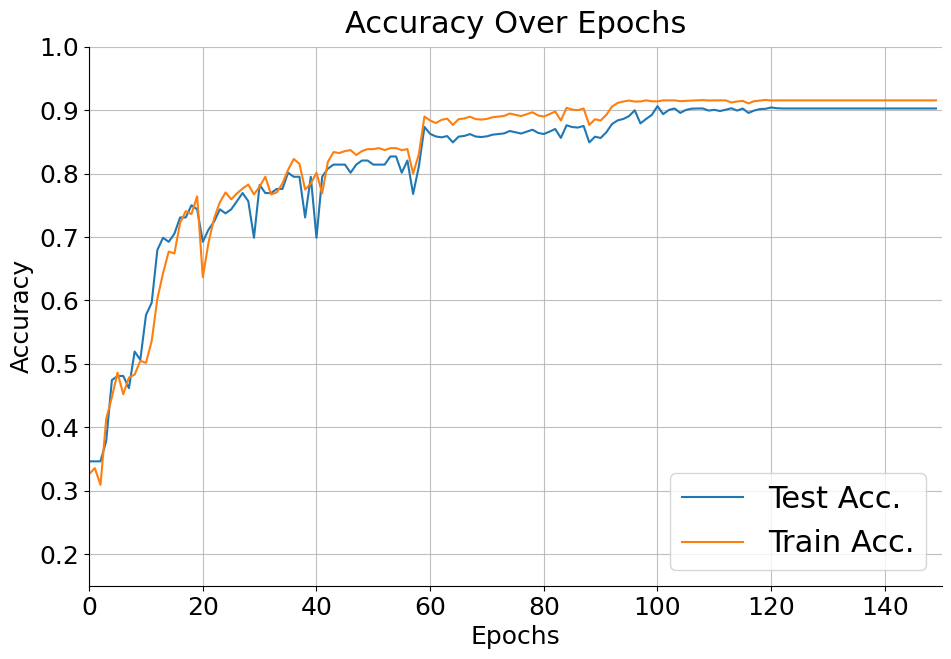

In [4]:
#Accuracy Curve
plt.figure(figsize=(11,7))

plt.plot(df['val_acc'],label='Test Acc.')
plt.plot(df['acc'],label='Train Acc.')

plt.legend(loc=4,fontsize=22)
plt.grid(alpha=0.8)

spines = plt.gca().spines

spines['top'].set_visible(False)
spines['right'].set_visible(False)

plt.ylim(0.15,1.0);
plt.xlim(0,150);
plt.title('Accuracy Over Epochs',fontsize=22,pad=10)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.tick_params(axis='both', labelsize=18)

plt.savefig('Visualizations/Accuracy Curve.png',bbox_inches='tight')

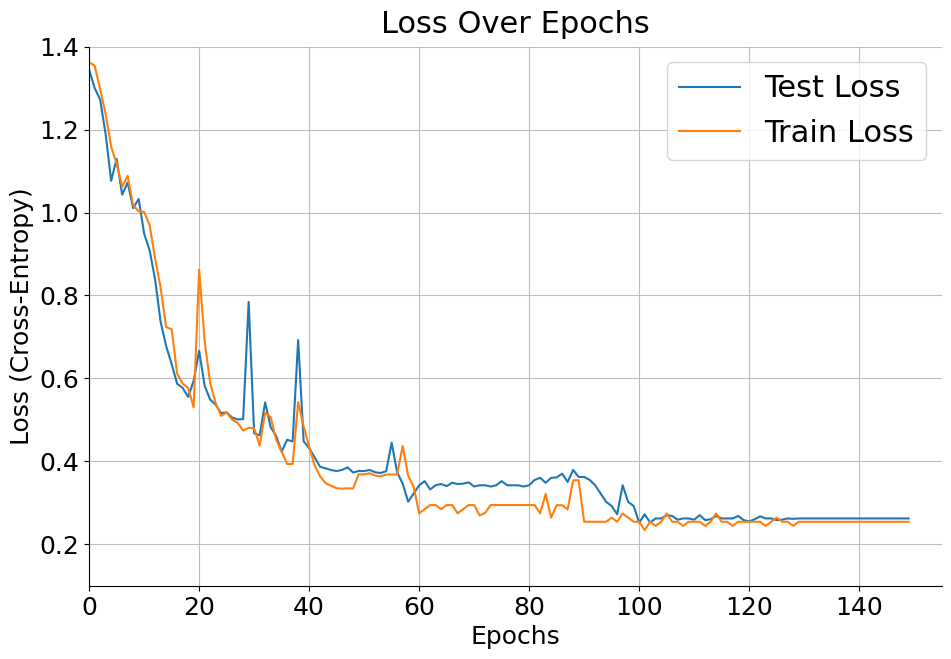

In [5]:
#Loss Curve
plt.figure(figsize=(11,7))

plt.plot(df['val_loss'],label='Test Loss')
plt.plot(df['loss'],label='Train Loss')

plt.legend(loc=1,fontsize=22)
plt.grid(alpha=0.8)

spines = plt.gca().spines

spines['top'].set_visible(False)
spines['right'].set_visible(False)

plt.ylim(0.1,1.4);
plt.xlim(0,155);
plt.title('Loss Over Epochs',fontsize=22,pad=10)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss (Cross-Entropy)',fontsize=18)
plt.tick_params(axis='both', labelsize=18)

plt.savefig('Visualizations/Loss Curve.png',bbox_inches='tight')

In [6]:
#Setting Class Labels
Class_labels = ['One','Two','Five','Ten','Twenty']
Class_labels.sort()

## Step 3 : Loading Model and Test Images

In [12]:
from PIL import Image
import os
#Loading the model
from tensorflow.keras.models import load_model
model = load_model('Saved_Model')

#Taking Some Test Images
test = {'Images' : [],
        'Input' : []}

dir_path = 'TestImages/'
extensions=[".jpg",".jpeg",".png"]
for file in os.listdir(dir_path):
  #Load Image
  print("File : ", file)
  root, extension = os.path.splitext(file)
  if(extension.lower() in extensions):
        im = Image.open(dir_path + file)
        #print("Image Extension : ", extension)
        #Resize Image
        im = im.crop((1000,700,3000,2300))
        im = im.resize((400,300))

        #Store Sized Image File
        test['Images'].append(im)

        #Rescale and Store normalized array
        im = Image.open(dir_path + file)
        im = im.resize((320,240))
        im = np.asarray(im)
        im = im/255
        im = np.expand_dims(im,axis=0)
        test['Input'].append(im)

File :  Five_1.jpg
File :  Five_2.jpg
File :  Five_3.jpg
File :  One_1.jpg
File :  One_2.jpg
File :  One_3.jpg
File :  Ten_1.jpg
File :  Ten_2.jpg
File :  Ten_3.jpg
File :  Thumbs.db
File :  Twenty_1.jpg
File :  Twenty_2.jpg
File :  Twenty_3.jpg
File :  Two_1.jpg
File :  Two_2.jpg
File :  Two_3.jpg


## <font style = "color:rgb(50,120,229)">Step 4: Plotting Images</font>

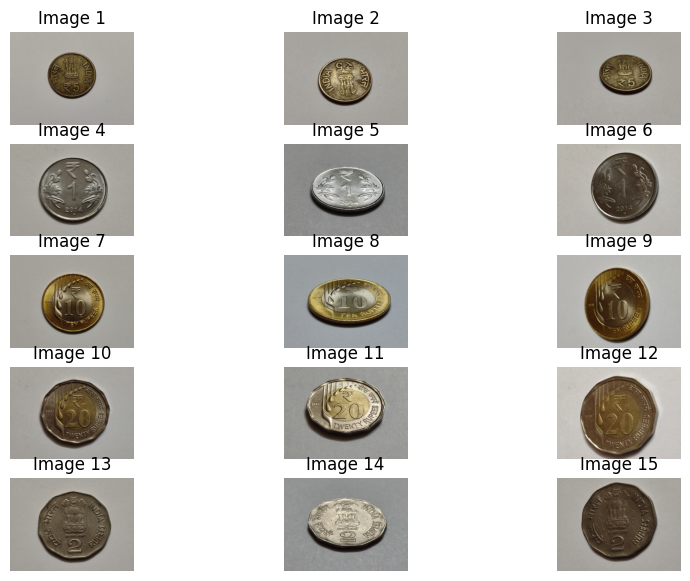

In [14]:
# Plotting Images
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7),dpi=100)
rows=int(len(test['Images'])/3)
columns = 3

for i in range(len(test['Images'])):
  fig.add_subplot(rows, columns, i+1)
  plt.axis('off')
  plt.title('Image '+str(i + 1))
  plt.imshow(test['Images'][i])

## Predicting Class for the Test Images

1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 38ms/step


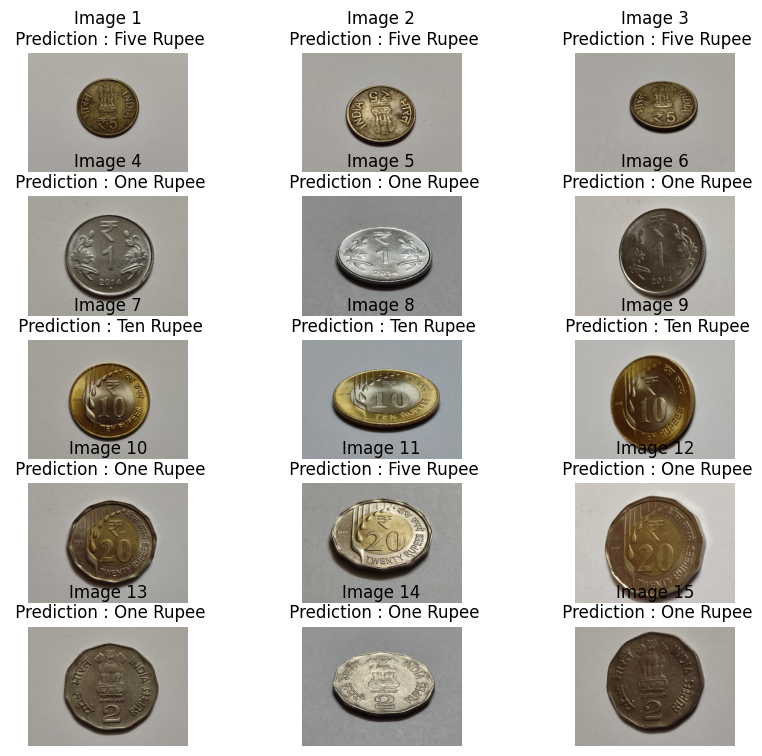

In [20]:
#Getting Prediction
prediction_labels = []
for inp_img in test['Input']:
  pred_prob = model.predict(inp_img)
  prediction = Class_labels[np.argmax(pred_prob)]
  prediction_labels.append(prediction)

#Plotting Results
fig = plt.figure(figsize=(10,9),dpi=100)
rows=int(len(test['Images'])/3)
columns = 3

for i,pred in zip(range(int(len(test['Images']))),prediction_labels):
  fig.add_subplot(rows, columns, i+1)
  plt.axis('off')
  plt.title('Image '+str(i + 1)+'\n Prediction : {} Rupee'.format(pred))
  plt.imshow(test['Images'][i])
 
plt.savefig('Visualizations/Prediction.png',bbox_inches='tight')